# A brief introduction to reinforcements learning

## so what is reinforcements learning 

Reinforcement learning (RL) is an area of machine learning concerned with how intelligent agents ought to take actions in an environment in order to maximize the notion of cumulative reward (wikipedia)

## Before understend reinforcement learning in computer, we need to understand who reinforcement learning work in humen

### so lets take a look on the first steps of an baby (humen)

![hello](stuff\baby_pic.jpg)


### Lets ask some questions 
1. who is our agent (who is "learn") ?
2. what is our environment ? 
3. what is mother rule ? 
4. what is the reward ? 

### This the baby is sucss in the first time to walk ? 


#### NO , The baby needs to study for a full time until he can walk

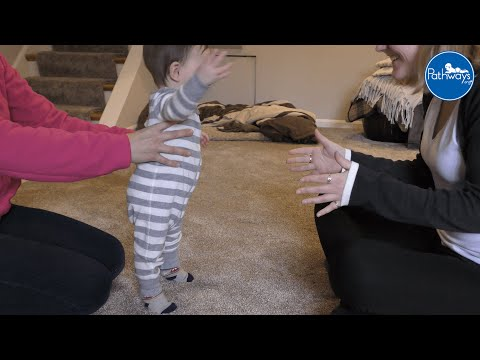

In [1]:
## python code to load the video
from IPython.display import YouTubeVideo

YouTubeVideo('ZEfvYzJKZdU', width=800, height=300)

### Lets go back to renforsment learnig in computer and try to defint that


The reinforcement learning is based on learning from trial and error that takes place in a series of interactions between a learning agent (software component or robot) and his environment that is represented as sensory information available to the learning agent. In each such interaction, the agent receives information from his environment regarding the correct situation and chooses to take action to distribute actions available to him in need of the current action policy.

### Ok Let's see that

![](stuff\agent_pic.webp)

### Ok we learn computer science, it's time to code our agent !!!



### What is gym

Gym is a toolkit for developing and comparing reinforcement learning algorithms. It makes no assumptions about the structure of your agent, and is compatible with any numerical computation library, such as TensorFlow or Theano.

In [2]:
import gym
# lodaing the enviorment
env = gym.make("MountainCar-v0")

observation (object): an environment-specific object representing your observation of the environment. For example, pixel data from a camera, joint angles and joint velocities of a robot, or the board state in a board game.

reward (float): amount of reward achieved by the previous action. The scale varies between environments, but the goal is always to increase your total reward.

done (boolean): whether it’s time to reset the environment again. Most (but not all) tasks are divided up into well-defined episodes, and done being True indicates the episode has terminated. (For example, perhaps the pole tipped too far, or you lost your last life.)


In [4]:
import gym
# lodaing the enviorment
env = gym.make("MountainCar-v0")

for i_episode in range(3):
    observation = env.reset()
    for t in range(100):
        env.render()
        action = 0 #
        # print("I did step {0} in epsidoe {1}".format(t,i_episode))
        observation, reward, done, _ = env.step(action)
    # print("episode {0} finished".format(i_episode)) 
env.close()

In [19]:
# This tells us that the state space represents a 2-dimensional box, 
# so each state observation is a vector of 2 (float) values, and that the action space comprises three discrete actions
# (which is what we already knew)
print("State space: ", env.observation_space)
print("Action space: ", env.action_space)

State space:  Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)
Action space:  Discrete(3)


In [10]:
# From this, we can see that the first element of the state vector (representing the cart’s position) 
# can take on any value in the range -1.2 to 0.6, while the second element (representing the cart’s velocity) 
# can take on any value in the range -0.07 to 0.07.
print(env.observation_space.low)
print(env.observation_space.high)

[-1.2  -0.07]
[0.6  0.07]


In [11]:
# The initial state of an environment is returned when you reset the environment:
print(env.reset())

[-0.53286325  0.        ]


In [12]:
# To take an action (for example, a = 2), 
# it is necessary to “step forward” the environment by that action using the step() method. 
# This returns a 4-ple giving 
# the new state
# reward 
# a Boolean indicating whether or not the episode has terminated (due to the goal being reached or 200 steps having elapsed)
# any additional information (this is always empty for this problem)
print(env.step(2))

(array([-0.53179378,  0.00106947]), -1.0, False, {})


# Reinforcements learning algoritem
In the first article in this series, we went through the Q-learning algorithm in detail. When going though this algorithm, we assumed a one-dimensional state space, so our goal was to find the optimal Q table, Q(s,a).
In this problem, since we our dealing with a two-dimensional state space, we replace Q(s, a) with Q(s1, s2, a), but other than that, the Q-learning algorithm remains more or less the same.
To recap, the algorithm is as follows:

## 1. Initialize Q(s1, s2, a) by setting all of the elements equal to small random values;

In [25]:
import numpy as np
num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
num_states = np.round(num_states, 0).astype(int) + 1
    
    
# Initialize Q table
Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
print(Q.shape)
print(Q[0])

(19, 15, 3)
[[ 0.81848682  0.17396768 -0.47633005]
 [-0.75428578 -0.11881647  0.10337941]
 [ 0.10193625 -0.55172003 -0.30287127]
 [-0.71712165 -0.68561265  0.61685795]
 [ 0.4246616  -0.21030546 -0.89532708]
 [ 0.44326869  0.35153449  0.79015444]
 [-0.0263188   0.01852644  0.93518096]
 [-0.62668267 -0.31397361 -0.45392466]
 [-0.43577562 -0.28674825 -0.31688229]
 [ 0.92218227  0.79102458 -0.45156111]
 [-0.31168809  0.42213902  0.51658087]
 [ 0.66601045 -0.90401472 -0.32583892]
 [-0.68305007 -0.62872709  0.45368653]
 [-0.81377992 -0.86939443  0.00653492]
 [ 0.54104462 -0.35645124 -0.91737307]]


![](stuff\3_dim.png)

## 2. Observe the current state, (s1, s2);

In [10]:
# Discretize state
state_adj = (state - env.observation_space.low)*np.array([10, 100])
state_adj = np.round(state_adj, 0).astype(int)

NameError: name 'state' is not defined

![](stuff\init_new_dim.png)

## 3. Based on the exploration strategy, choose an action to take, a;

In [12]:
# Determine next action - epsilon greedy strategy
if np.random.random() < 1 - epsilon:
    action = np.argmax(Q[state_adj[0], state_adj[1]]) 
    else:
    action = np.random.randint(0, env.action_space.n)

SyntaxError: invalid syntax (<ipython-input-12-e943320ff3f7>, line 4)

![](stuff\choose_where_to_go_new.png)

## 4. Take action a and observe the resulting reward, r, and the new state of the environment, (s1’, s2’);


In [13]:
# Get next state and reward
next_state, reward, done, info = env.step(action)        
# Discretize next_state
next_state_adj = (next_state - env.observation_space.low)*np.array([10, 100])
next_state_adj = np.round(next_state, 0).astype(int)

![](stuff\next_state.png)

## 5. Update Q(s1, s2, a) based on the update rule:

In [ ]:
#Allow for terminal states         
if done and next_state[0] >= 0.5:
    Q[state_adj[0], state_adj[1], action] = reward
                
# Adjust Q value for current state
else:
    delta = learning*(reward + discount*np.max(Q[next_state_adj[0], next_state_adj[1]]) - Q[state_adj[0], state_adj[1],action])
    Q[state_adj[0], state_adj[1],action] += delta

![](stuff\save_pic.png)

In [41]:
def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
    
        while done != True:   
            # Render environment for last five episodes
            if i >= (episodes - 20):
                env.render()
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning*(reward + 
                                 discount*np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            
    env.close()
    
    return ave_reward_list


In [42]:
# Run Q-learning algorithm
# (env, learning, discount, epsilon, episodes):
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 5000)

# Plot Rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.savefig('rewards.jpg')     
plt.close() 

Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0
Episode 2800 Average Reward: -200.0
E

In [147]:
import numpy as np 
import matplotlib.pyplot as plt
print(Q.shape)
new_Q = np.transpose(Q, (2, 1, 0))
fig, axs = plt.subplots(2, 2)
print(new_Q.shape)
print(new_Q[0].shape)
plt.imshow(new_Q[0], interpolation='none')
plt.show()

(19, 15, 3)
(3, 15, 19)
(15, 19)


In [197]:
import numpy as np
import matplotlib.pyplot as plt
i=0
fig, axes = plt.subplots(ncols=3)
for ax in axes.flat:
    im = ax.imshow(new_Q[i],cmap="inferno")
    i+=1
# fig.subplots_adjust(right=0.8)
fig.colorbar(im)
plt.show()

In [209]:
%matplotlib qt
from matplotlib import pyplot as plt
import numpy as np
fig, axes = plt.subplots(ncols=3)
for i in range(100):
    j = 0
    for ax in axes.flat:             
        
        im = ax.imshow(new_Q[j], cmap='inferno')
        j+=1
    # temp = new_Q[0]
    # im1 = ax.imshow(temp, cmap='coolwarm', aspect='equal')
    if i == 0:
        cbar = plt.colorbar(im)
    else:
        cbar.update_normal(im)
    new_Q[0][0][9]+=0.1
    plt.pause(0.00000001)

# from matplotlib import pyplot as plt
# import numpy as np

# fig1 = plt.figure()
# ax = fig1.add_subplot(111)
# for i in range(100):
#     temp = np.random.normal(0, 1, size=(10,10))
#     im1 = ax.imshow(temp, cmap='coolwarm', aspect='equal')
#     if i == 0:
#         cbar = plt.colorbar(im1)
#     else:
#         cbar.update_normal(im1)
#     plt.pause(0.00000001)

In [1]:
%matplotlib qt
from matplotlib import pyplot as plt
import numpy as np

fig, axes = plt.subplots(ncols=3)
                     
def QLearning_plot(env, learning, discount, epsilon, min_eps, episodes):
    # Initialize Q table
        # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    Q = np.random.uniform(low = 1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n)) 

    
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 10])
        state_adj = np.round(state_adj, 0).astype(int)
    
        while done != True:   
            # Render environment for last five episodes
            if i >= (episodes - 20):
               env.render()
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            # get to the flag
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning*(reward + 
                                 discount*np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))

        if i == 0 or (i+1) % 100 ==0:
            Q_plot = np.transpose(Q, (2, 1, 0))
            j = 0
            for ax in axes.flat:   
                im = ax.imshow(Q_plot[j], cmap='inferno', aspect='equal')
                ax.invert_yaxis()
                j+=1
            if i == 0:
                k = 0
                for ax in axes.flat:
                    ax.invert_yaxis()
                    ax.set(xlabel='car’s position', ylabel='car’s velocity', title='action {0}'.
                              format(k))  
                    k+=1
                cbar = plt.colorbar(im)
            else:
                cbar.update_normal(im)
            plt.pause(0.00000001)
    env.close()
    
    return Q







In [2]:
import gym
# lodaing the enviorment
env = gym.make("MountainCar-v0")
Q_table = QLearning_plot(env, 0.2, 0.9, 0.8, 0, 5000)

Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0
Episode 2800 Average Reward: -199.71


In [14]:
def test():
    env = gym.make("MountainCar-v0")
    done = False
    action = 0
    # Run Q learning algorithm
    for i in range(0,3):
        # Initialize parameters
        is_done = False
        state = env.reset()
        state_adj = (state - env.observation_space.low)*np.array([10, 10])
        state_adj = np.round(state_adj, 0).astype(int)
        while is_done != True:
            env.render()
            action = np.argmax(Q_table[state_adj[0], state_adj[1]]) 
            state2, reward, done, info = env.step(action) 
            # get to the flag
            if done and state2[0] >= 0.5:
                print(state2[0])
                is_done = True
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            state_adj = state2_adj
            # print(done)
        print("finish!!")
    env.close()

In [15]:
test()

0.5094274190567265
finish!!
0.5094274190567265
finish!!
0.5097561367690611
finish!!
